In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pingouin
import random

In [2]:
sales = pd.read_csv('supermarket_sales.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


El CSV 'Sales' contiene informacion de las ventas de un supermercado que cuenta con tres sucursales, A, B y C, ubicadas cada una en localidades distintas. Los datos corresponder a las ventas realizadas durante tres meses. Cada fila representa una venta realizada, y brinda informacion de cada una de ellas como ser: 
- Invoice ID : ID de la venta
- Branch : Tienda (Sucursal)
- City : Ciudad
- Customer Type : Tipo de comprador (Si es miembro o no)
- Gender : Genero del comprador
- Product Line : Linea de productos vendidos
- Unit Price : Precio unitario
- Quantity : Cantidad de productos
- Tax 5% : Impuestos del 5%
- Total : Importe total resultante de la venta
- Date : Fecha de la venta
- Time : Hora de la venta
- Payment : Metodo de pago
- cogs : Costo de la mercaderia vendida
- gross margin percentage : Porcentaje de ganancia marginal
- gross income : Importe de ganancia
- Rating : Calificacion por parte del comprador

La columna 'cogs' del DataFrame, tiene un calculo incorrecto del costo de mercaderias vendidas (ya que esta calculado como precio unitario * cantidad), arrojando el ingreso neto sin impuestos, no el costo de ventas, alterando asi las columnas 'gross margin percentage' y 'gross income'.
Por ello, he decidido crear una formula para generar aleatoriamente el costo de venta de cada producto entre un 60% y un 80% del valor neto de la venta

1. En primer lugar, creo una columna nueva llamada Net Total, la cual calcula Precio por cantidad vendida

In [4]:
sales['Net total'] = sales['Unit price'] * sales['Quantity']

In [5]:
np.random.seed(120)
def generate_value(net_total):
    return round(net_total * random.uniform(0.6 , 0.8), 2)

2. Una vez creada la funcion que genera un valor de costo de ventas aleatorio, reemplazo la columna original de 'cogs' por los nuevos valores.

In [6]:
sales['cogs'] = sales['Net total'].apply(generate_value)

3. Recalculo y reemplazo los valores de las columnas que estan relacionadas con el 'cogs', es decir: 'gross margin percentage' y 'gross income'

In [7]:
sales['gross margin percentage'] = ((sales['Net total']-sales['cogs'])/sales['Net total'])*100
sales['gross income'] = sales['Net total'] - sales['cogs'] 

4. Resultado del DataFrame con los nuevos datos:

In [8]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,313.75,39.990054,209.08,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,53.61,29.829843,22.79,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,216.58,33.218217,107.73,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,351.85,24.456802,113.91,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,389.83,35.476770,214.34,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,29.81,26.121437,10.54,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,622.51,36.074143,351.29,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,23.90,24.937186,7.94,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,48.86,25.767244,16.96,4.1,65.82


In [9]:
print(sales.info())
print(sales.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Como hay columnas que no tienen el tipo de dato correcto, como ser los stings o columna de fecha y hora, los cuales tienen asignado el tipo object, modifico el tipado.

In [10]:
sales[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']] = sales[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']].astype('string')
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'],format='%H:%M').dt.time

In [11]:
sales


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,313.75,39.990054,209.08,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,53.61,29.829843,22.79,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,216.58,33.218217,107.73,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,351.85,24.456802,113.91,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,389.83,35.476770,214.34,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,29.81,26.121437,10.54,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,622.51,36.074143,351.29,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,23.90,24.937186,7.94,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,48.86,25.767244,16.96,4.1,65.82


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   string        
 2   City                     1000 non-null   string        
 3   Customer type            1000 non-null   string        
 4   Gender                   1000 non-null   string        
 5   Product line             1000 non-null   string        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

**Como se distribuyen las ventas por categorias?**

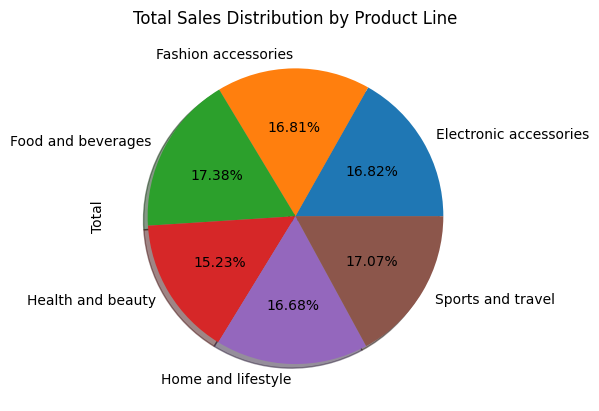

In [13]:
sales.groupby('Product line')['Total'].sum().plot(kind = 'pie',shadow = True,autopct = '%.2f%%',title = 'Total Sales Distribution by Product Line')
plt.show()

Como se puede notar, la categoria que representa el mayor porcentaje de las ventas totales es "food and beverages"

**Cuales son las dos categorias de productos mas vendidas entre mujeres?**

Filtro el DataFrame apra mostrar unicamente las ventas reaalizadas a personas de genero femenino. Al DataFrame resultante lo vuelvo a filtrar por linea de producto para contar la cantidad de ventas a mujeres en cada categoria

In [14]:
women_sales = sales[sales['Gender'] == 'Female']
women_sales_category= women_sales['Product line'].value_counts()
women_sales_category_sorted = women_sales_category.sort_values(ascending=False).reset_index()
#Ordeno la tabla resultante y aplico reset_index para poder acceder a las categorias con mayor cantidad de ventas mediante .iloc
first_category_women = women_sales_category_sorted.iloc[0,0]
second_category_women = women_sales_category_sorted.iloc[1,0]
print(f'Las dos categorias mas vendidas entre mujeres son {first_category_women} y {second_category_women}')

Las dos categorias mas vendidas entre mujeres son Fashion accessories y Food and beverages


**Cuales son las dos categorias de productos mas vendidas entre hombres?**

In [15]:
men_sales = sales[sales['Gender'] == 'Male']
men_sales_category= men_sales['Product line'].value_counts()
men_sales_category_sorted = men_sales_category.sort_values(ascending=False).reset_index()
print(f'Las dos categorias mas vendidas entre hombres son {men_sales_category_sorted.iloc[0,0]} y {men_sales_category_sorted.iloc[1,0]}')


Las dos categorias mas vendidas entre hombres son Health and beauty y Electronic accessories


**Cual es el genero que mas compras ha realizado en cada ubicacion?**

In [16]:
sales_by_gender = sales.groupby('City')['Gender'].value_counts(normalize=True).reset_index().sort_values(['City', 'proportion'], ascending=[True,False])
sales_by_gender['proportion'] = sales_by_gender['proportion'].round(2)
sales_by_gender

,City,Gender,proportion
0,Mandalay,Male,0.51
1,Mandalay,Female,0.49
2,Naypyitaw,Female,0.54
3,Naypyitaw,Male,0.46
4,Yangon,Male,0.53
5,Yangon,Female,0.47


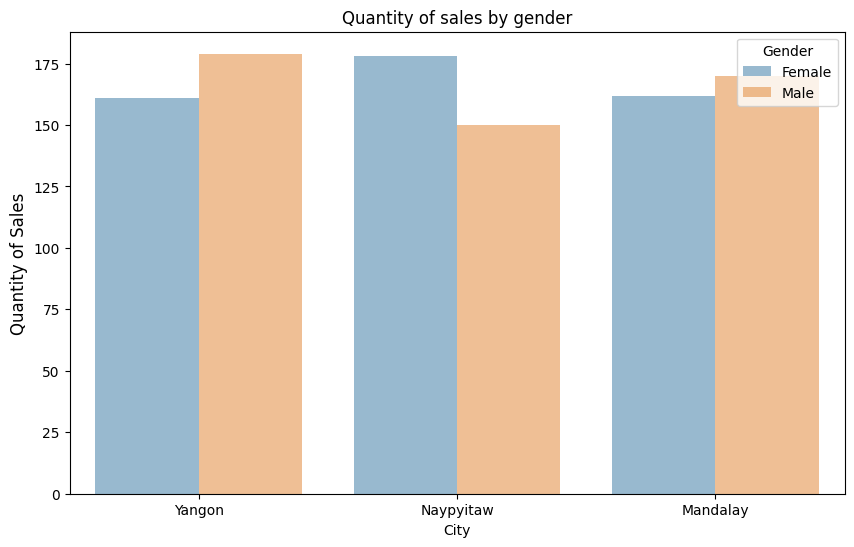

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Quantity of sales by gender')
plt.ylabel('Quantity of Sales', fontsize=12)
sns.countplot(data=sales, x='City', hue='Gender', alpha=0.5)
plt.show()

In [18]:
#Uso idxmax() para seleccionar los indices con mayor proporcion y luego filtrarlos en el DF original
idx = sales_by_gender.groupby('City')['proportion'].idxmax()
max_proportion_by_city = sales_by_gender.loc[idx]
max_proportion_by_city

,City,Gender,proportion
0,Mandalay,Male,0.51
2,Naypyitaw,Female,0.54
4,Yangon,Male,0.53


In [19]:
#Lo convierto en diccionario para poder acceder facilmente a la respuesta de Genero de mayor compras por ciudad.
gender_proportion_by_city = max_proportion_by_city.to_dict('records')
gender_proportion_by_city

[{'City': 'Mandalay', 'Gender': 'Male', 'proportion': 0.51},
 {'City': 'Naypyitaw', 'Gender': 'Female', 'proportion': 0.54},
 {'City': 'Yangon', 'Gender': 'Male', 'proportion': 0.53}]

**En que mes se registraron mayores ingresos totales?**

In [20]:
#Convierto la columna Date al tipo DateTime. Luego creo una lista que contenga el orden de los meses, para que no se ordenen alfabeticamente.
month_order = ['January', 'February', 'March']
sales['Month'] = pd.Categorical(sales['Date'].dt.month_name(), categories = month_order, ordered=True)
sales_by_month=sales.groupby('Month')['Total'].sum().reset_index()
sales_by_month


C:\Users\elian\AppData\Local\Temp\ipykernel_24512\1633774089.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_month=sales.groupby('Month')['Total'].sum().reset_index()


,Month,Total
0,January,116291.868
1,February,97219.374
2,March,109455.507


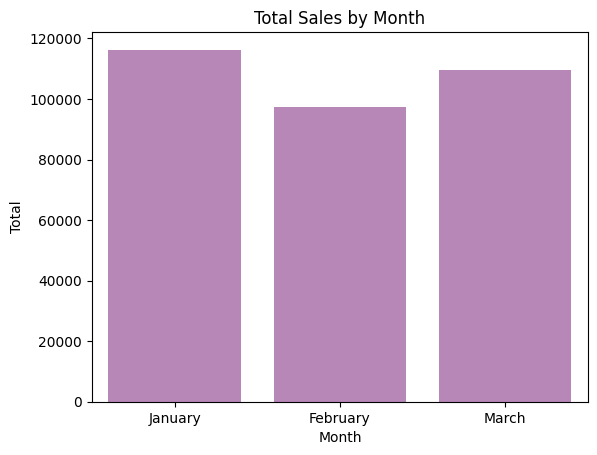

In [21]:
g=sns.barplot(data=sales_by_month, x='Month', y='Total', errorbar=None, color='purple', alpha=0.5)
g.set_title('Total Sales by Month')
plt.show()

In [22]:
sales_by_month_sorted = sales_by_month.sort_values('Total', ascending=False)
sales_by_month_sorted
max_total_sales_by_month = sales_by_month_sorted.iloc[0,0]
max_total_sales = sales_by_month_sorted.iloc[0,1]
print(f'El mes de {max_total_sales_by_month} es el que mayor ventas registra, con un ingreso total por ventas de $ {max_total_sales}')


El mes de January es el que mayor ventas registra, con un ingreso total por ventas de $ 116291.868


**En que mes se registro un mayor ingreso promedio?**

C:\Users\elian\AppData\Local\Temp\ipykernel_24512\2000173511.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_mean_by_month=sales.groupby('Month')['Total'].mean().reset_index()


      Month       Total
0   January  330.374625
1  February  320.856020
2     March  317.262339


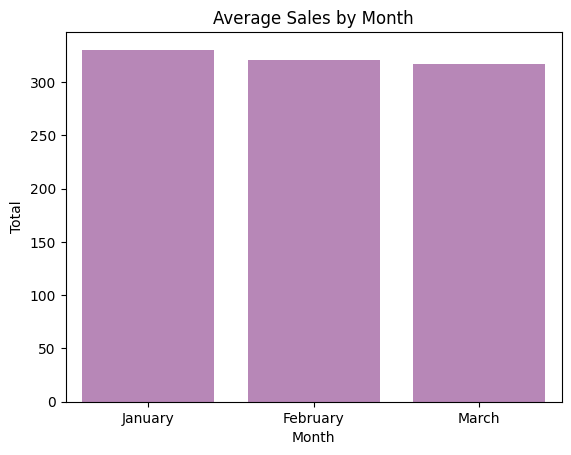

In [23]:
#Mismo procedimiento que para ventas totales, pero aplicando la funcion .mean() en lugar de .sum()
sales_mean_by_month=sales.groupby('Month')['Total'].mean().reset_index()
print(sales_mean_by_month)

g_mean=sns.barplot(data=sales_mean_by_month, x='Month', y='Total', errorbar=None, color='purple', alpha=0.5)
g_mean.set_title('Average Sales by Month')
plt.show()


In [24]:
sales_mean_by_month_sorted = sales_mean_by_month.sort_values('Total', ascending=False)
max_mean_total_sales_by_month = sales_mean_by_month_sorted.iloc[0,0]
max_mean_total_sales = sales_mean_by_month_sorted.iloc[0,1]
print(f'{max_mean_total_sales_by_month} es el mes con mayor promedio de ingresos por ventas, con un importe de $ {max_mean_total_sales}')

January es el mes con mayor promedio de ingresos por ventas, con un importe de $ 330.374625


**Cual fue el mes con mayor margen bruto?**

Utilizando groupby agrupo por mes la ganancia marginal, calculo su promedio, y ordeno el dataframe resultante en base a la ganancia marginal, de manera descendente.

In [25]:
gross_margin_by_month=sales.groupby('Month')['gross margin percentage'].mean().reset_index().sort_values('gross margin percentage', ascending=False)
gross_margin_by_month


C:\Users\elian\AppData\Local\Temp\ipykernel_24512\519641767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gross_margin_by_month=sales.groupby('Month')['gross margin percentage'].mean().reset_index().sort_values('gross margin percentage', ascending=False)


,Month,gross margin percentage
1,February,30.192278
2,March,30.162788
0,January,29.606534


In [26]:
max_gross_margin_percentage_by_month = gross_margin_by_month.iloc[0,0]
print(f'El mes de {max_gross_margin_percentage_by_month} fue el mes con mayor porcentaje de margen bruto')

El mes de February fue el mes con mayor porcentaje de margen bruto


**Cual fue la sucursal con mayor margen bruto?**

In [27]:
gross_margin_by_sucursal = sales.groupby('City')['gross margin percentage'].mean().reset_index().sort_values('gross margin percentage', ascending=False)
gross_margin_by_sucursal

,City,gross margin percentage
2,Yangon,30.173400
1,Naypyitaw,30.134389
0,Mandalay,29.617129


In [28]:
max_gross_margin_percentage_by_city = gross_margin_by_sucursal.iloc[0,0]
print(f'La sucursal de la ciudad de {max_gross_margin_percentage_by_city} es la que obtuvo un mayor porcentaje de margen bruto')

La sucursal de la ciudad de Yangon es la que obtuvo un mayor porcentaje de margen bruto


**Cual es la sucursal con mejor valoracion promedio de parte de los clientes?**

In [29]:
#Calculo el promedio de todas las sucursales
rating_mean = sales['Rating'].mean()
rating_mean


6.9727

In [30]:
rating_mean_by_city = sales.groupby('City')['Rating'].mean().reset_index()
rating_mean_by_city

,City,Rating
0,Mandalay,6.818072
1,Naypyitaw,7.072866
2,Yangon,7.027059


In [31]:
max_rating_mean_by_city = rating_mean_by_city[rating_mean_by_city['Rating']== rating_mean_by_city['Rating'].max()]
max_rating_mean_by_city

,City,Rating
1,Naypyitaw,7.072866


In [32]:
max_mean_rating_city = rating_mean_by_city.iloc[0,0]
max_mean_rating = max_rating_mean_by_city.iloc[0,1].round(2)
print(f'La sucursal ubicada en {max_mean_rating_city} es la que obtuvo una mejor calificacion por parte de los clientes, con una puntuacion de {max_mean_rating}')

La sucursal ubicada en Mandalay es la que obtuvo una mejor calificacion por parte de los clientes, con una puntuacion de 7.07


C:\Users\elian\AppData\Local\Temp\ipykernel_24512\1830305928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales, x='Product line', y='Rating', palette='pastel')


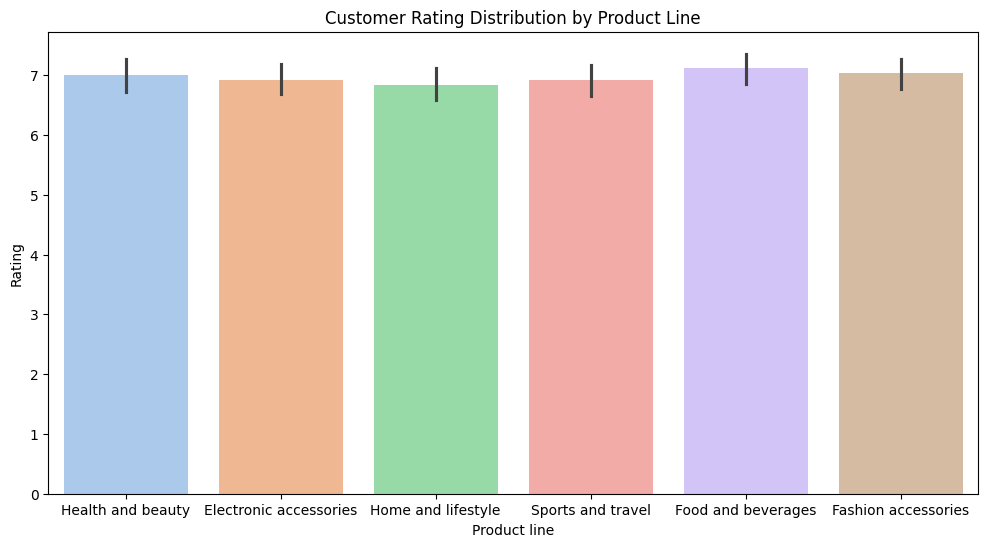

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales, x='Product line', y='Rating', palette='pastel')
plt.title('Customer Rating Distribution by Product Line', fontsize=12)
plt.show()

Como puede observarse, en promedio todos los productos rondan el puntaje de 7 puntos, lo que demuestra un alto nivel de satisfaccion por parte de los clientes.

**Las ventas totales son mayores en el caso de los miembros o de los clientes normales?**

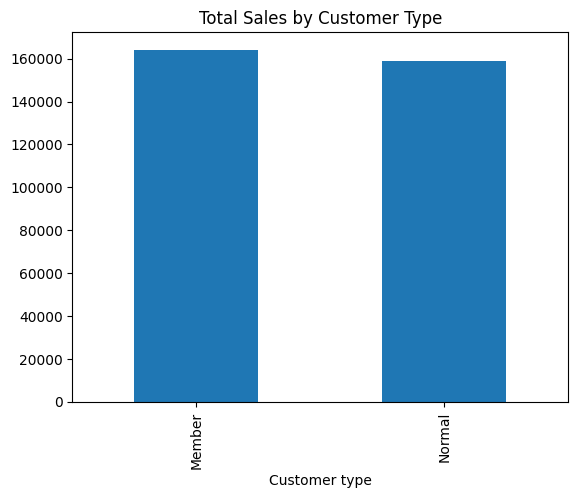

In [34]:
sales.groupby('Customer type')['Total'].sum().plot(kind = 'bar',title = 'Total Sales by Customer Type')
plt.show()

Las ventas totles son mayores para aquellos clientes que pagan una membresia, esto sugiere que el programa ofrecido para miembros es efectivo a la hora de atraer clientes.